# LR_tutorial
Following the course https://learning.edx.org/course/course-v1:StanfordOnline+STATSX0001+1T2022/block-v1:StanfordOnline+STATSX0001+1T2022+type@sequential+block@00b646c1309e42f2b8c1a770516fdef4/block-v1:StanfordOnline+STATSX0001+1T2022+type@vertical+block@06c48989273b4007aae177104fd65db0.

Or if this video series is down I have the video recorded here: https://drive.google.com/file/d/1zk3WNzREpZYVvM2Fpl3jWkzvpcI3_1KT/view?usp=sharing.

StatQuest is a good resource for inutitive videos: https://www.youtube.com/watch?v=nk2CQITm_eo This episode in particular is very useful. At 5:39 he begins talking about the variance calculation which goes into calculating the variance of the LR line error. Very helpful.

## Loading in the data

In [5]:
library(MASS)
library(ISLR)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

## Looking at the data
First things first, lets look at the data. 
lstat is the proportion of lower status ind
in the community. We can see more = more crime.

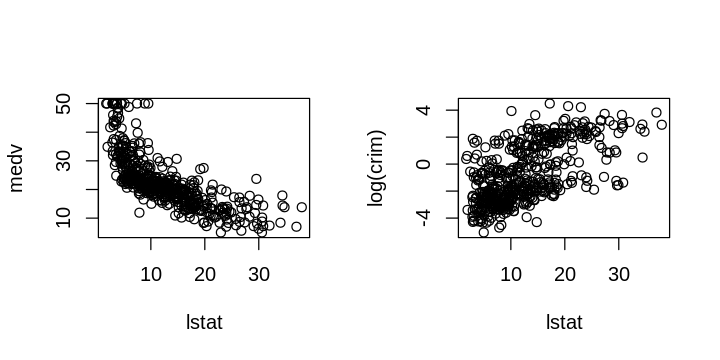

In [73]:
options(repr.plot.width=6, repr.plot.height=3)
par(mfrow=c(1,2))
plot(medv ~ lstat, Boston)
plot(log(crim) ~ lstat, Boston)

## Fitting a model
Fitting an LM to the data is very easy!


In [60]:
fit1= lm(medv ~ lstat, data=Boston)
summary(fit1)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


,0.5 %,99.5 %
(Intercept),33.099101,36.0085810
lstat,-1.050199,-0.8498995


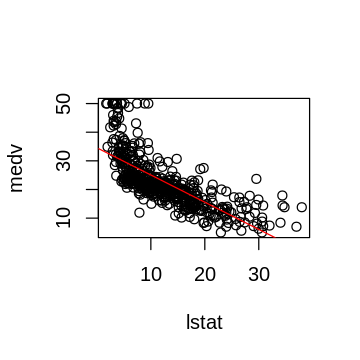

In [61]:
# We can see what the fitted line looks like on our data
plot(medv ~ lstat, Boston)
abline(fit1, col='red')
# And the confidence interval
confint(fit1, level=0.99)

## Making a prediction on "new" data
We get the fit column, which tells us the expected value, then an upper and lower bound range in the lwr and upr columns.

In [62]:
predict(fit1, data.frame('lstat'=c(5,10,15, 45)), interval='confidence')

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461
-8.19838,-10.71910,-5.67766


# Multiple LR
Once again, it is incredibly easy. R just lets us give it a formula with the variables seperated by plus signs. In this case lets see how age contributes to predicting the median value of homes. We can see that age is a significiant predictor of home value, however not as sigificant as lstat. We can interpret the values we get for Estimate as follows:
> For every percent increase of undesirables in a community, median home values drop by 1000$ in Boston! However as the community gets more estabilished, we see an increase by 34\\$.

In [63]:
fit2 = lm(medv ~ lstat + age, Boston)
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


# Lets see how we can use all our variables as predictions
By just placing a "." we indicate to use all variables as predictors. This actually caused age to no longer be significant! The professor interprets this as there being a lot stronger predictors of medv, that were also correlated with age. So when they were included the contribution age made, no longer mattered!

In [65]:
fit3 = lm(medv ~ ., Boston)
summary(fit3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8850  -2.7039  -0.5369   1.6784  26.1826 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.034e+01  1.073e+01   1.895 0.058726 .  
crim        -1.034e-01  3.291e-02  -3.142 0.001782 ** 
zn           4.631e-02  1.370e-02   3.380 0.000782 ***
indus        1.651e-02  6.142e-02   0.269 0.788150    
chas         2.685e+00  8.599e-01   3.122 0.001902 ** 
nox         -1.827e+01  3.824e+00  -4.778 2.34e-06 ***
rm           3.850e+00  4.178e-01   9.215  < 2e-16 ***
age          4.004e-04  1.319e-02   0.030 0.975786    
dis         -1.483e+00  1.991e-01  -7.446 4.34e-13 ***
rad          3.099e-01  6.626e-02   4.677 3.77e-06 ***
tax         -1.253e-02  3.755e-03  -3.338 0.000908 ***
ptratio     -9.351e-01  1.310e-01  -7.139 3.41e-12 ***
black       -1.628e-02  1.523e-02  -1.069 0.285727    
lstat       -5.270e-01  5.063e-02 -10.408  < 2e-16 ***
blk_prop   

# Plotting the output stats of an LM
Quite a bit to digest! 9:14 in the video.
* Residuals vs Fitted: Both at a particular X can be plotted together. We are looking for non-linerity, and indeed we see it at the two extremes. The prices of homes is not a linear value.

He doesn't go into detail about the other ones, saying they are out of the scope of this class :(

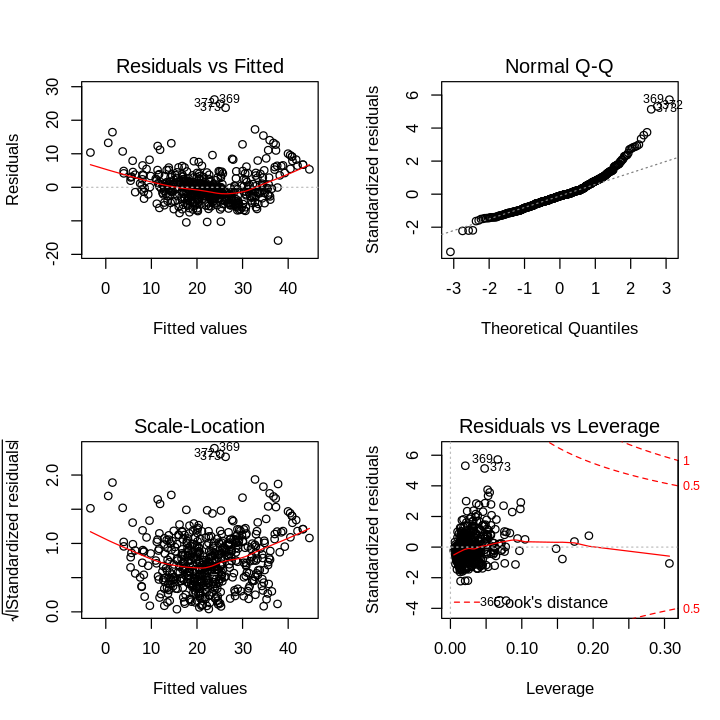

In [77]:
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow=c(2,2))
plot(fit3)

# Amending linear fits
This is pretty cool, we have the ```update``` command, where we can give it an amended formula and change what the LR is doing. ```~.-age-indus``` is the formula he uses, and the left hand side is blank which means to use the same response variable as before. The dot is the same as before as well. Then -age and -indus means to remove these variables from the model!

In [79]:
fit4 = update(fit3, ~.-age-indus-blk_prop)
summary(fit4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

# Dealing with Non-linearities!
My favorite partttt. Woah, a multiplication sign means "interaction". I am unsure of what that means mathematically, but we can see how it presents itself here ```age:lstat    0.0041560  0.0018518   2.244   0.0252 *```. We can see that the age itself is not significant, but the interaction for some reason is!

In [81]:
fit5 = lm(medv ~ age*lstat, Boston)
summary(fit5)


Call:
lm(formula = medv ~ age * lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age:lstat    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## Polynomial fits
If we remember our plot from earlier, lstat had a non-linear relationship with medv. We can model a quadratic by surrounding the lstat term with ```I(lstat^2)```. Plotting this requires the "points" command, and we can extract the fitted points from the fit by using the "fitted" command. We can also ask it to model the data as an n-degree polynomial with the "poly" command.

[1] "linear fit"


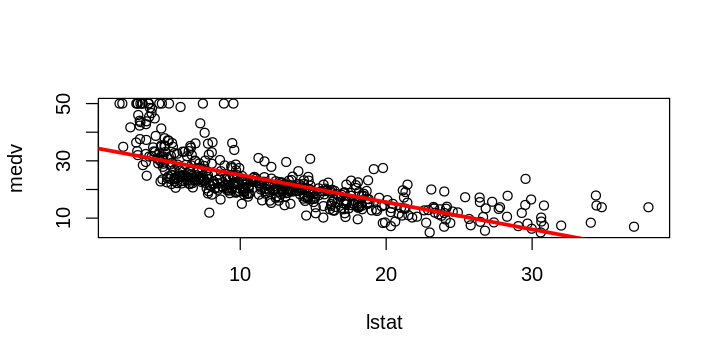

In [93]:
options(repr.plot.width=6, repr.plot.height=3)
plot(medv ~ lstat, Boston)
abline(fit1, col='red', lwd=3)
print("linear fit")


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


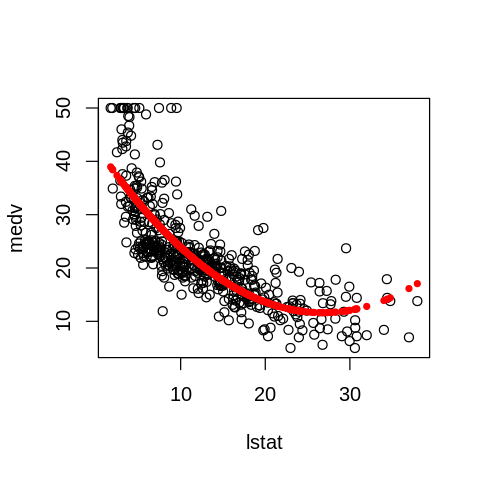

In [94]:
fit6 = lm(medv ~ lstat + I(lstat^2), Boston)
summary(fit6)
par(mfrow=c(1,1))
options(repr.plot.width = 4, repr.plot.height = 4)
plot(medv ~ lstat, Boston)
points(Boston$lstat, fitted(fit6), col='red', pch=20)

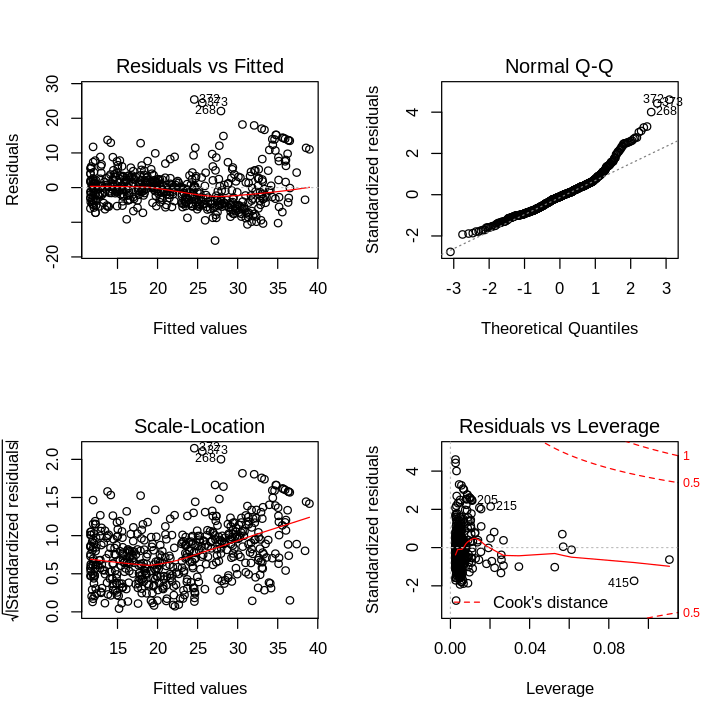

In [96]:
par(mfrow=c(2,2))
options(repr.plot.width = 6, repr.plot.height = 6)
plot(fit6)

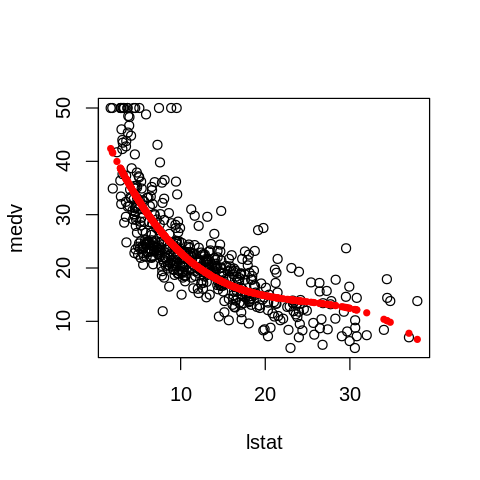

In [97]:
fit7 = lm(medv ~ poly(lstat, 3), Boston)
par(mfrow=c(1,1))
options(repr.plot.width = 4, repr.plot.height = 4)
plot(medv ~ lstat, Boston)
points(Boston$lstat, fitted(fit7), col='red', pch=20)

# The tutorial ends here
But I am curious about logarithmic fitting because to my eye, the medv/lstat relationship looks logarithmic in nature. I found a tutorial https://www.statology.org/logarithmic-regression-in-r/ about how I can fit it using the lm, and it seems pretty simple

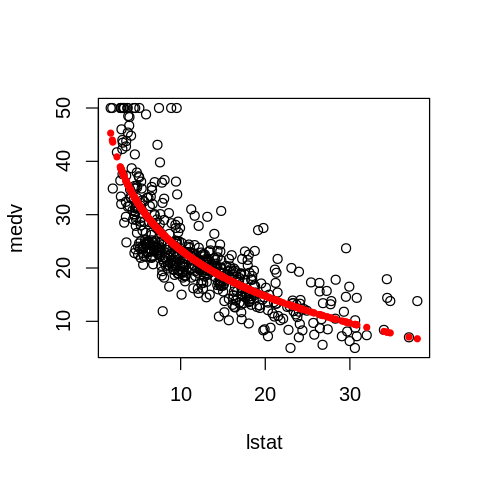

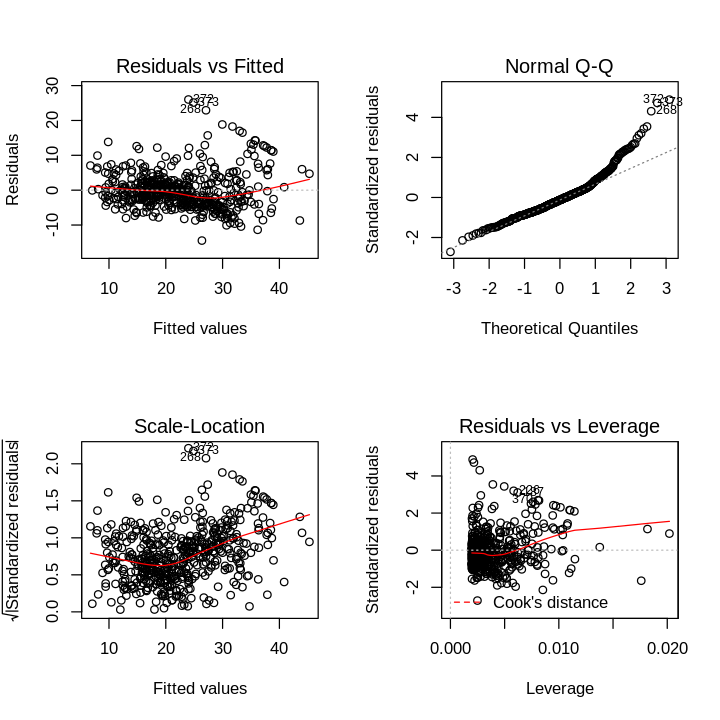

In [101]:
fit8 = lm(medv ~ log(lstat), Boston)
plot(medv~lstat, data=Boston)
points(Boston$lstat, fitted(fit8), col='red', pch=20)
par(mfrow=c(2,2))
options(repr.plot.width = 6, repr.plot.height = 6)
plot(fit8)

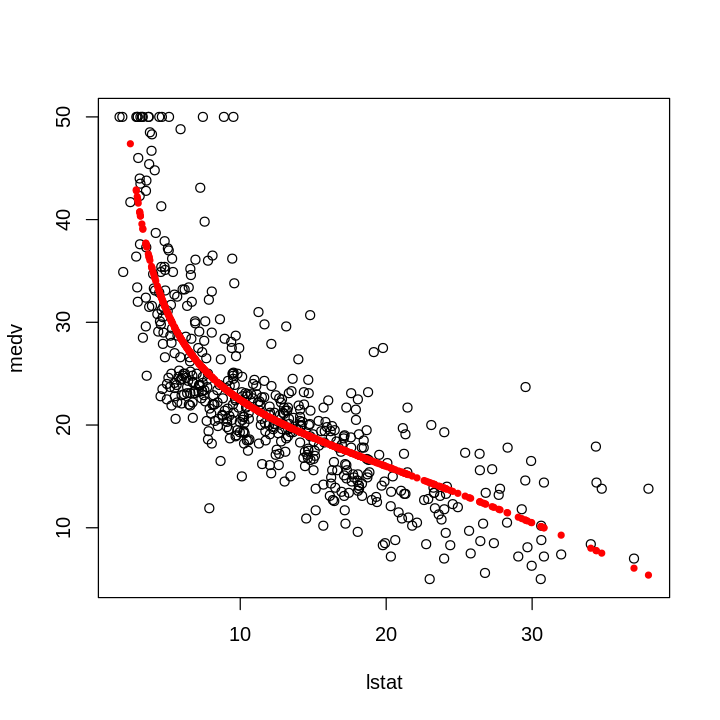

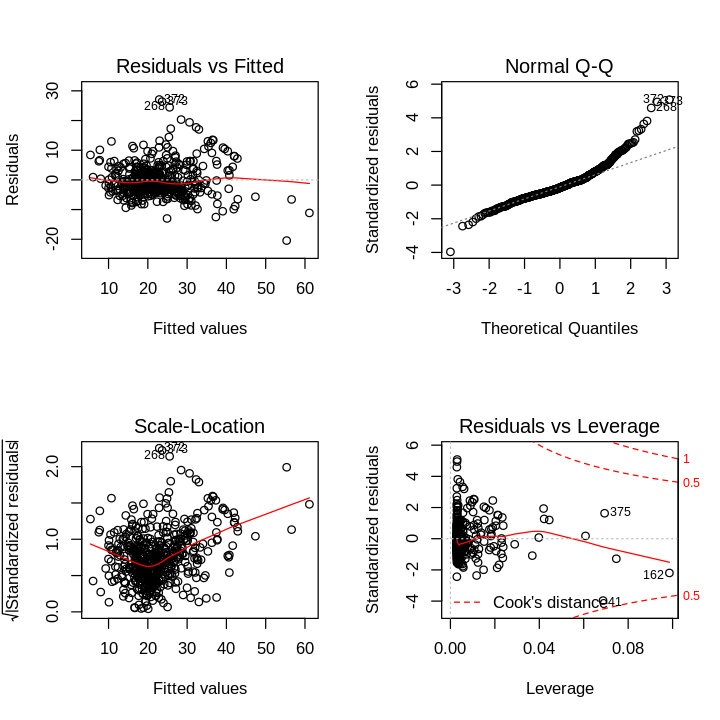

In [108]:
fit9 = lm(medv ~ I(1/lstat) + I(lstat^2), Boston)
plot(medv~lstat, data=Boston)
points(Boston$lstat, fitted(fit9), col='red', pch=20)
par(mfrow=c(2,2))
options(repr.plot.width = 6, repr.plot.height = 6)
plot(fit9)